Intro....

### Introduction: Home Credit Default Risk Competition
This notebook is intended for those who are new to machine learning competitions or want a gentle introduction to the problem. I purposely avoid jumping into complicated models or joining together lots of data in order to show the basics of how to get started in machine learning! Any comments or suggestions are much appreciated.

In this notebook, we will take an initial look at the Home Credit default risk machine learning competition currently hosted on Kaggle. The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

### Data
The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task.

There are 7 different sources of data:

application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
bureau_balance: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
previous_application: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
installments_payment: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.
This diagram shows how all of the data is related:

In [13]:
Make a SCHEMA

SyntaxError: invalid syntax (<ipython-input-13-60c6a5fa42d4>, line 1)

Moreover, we are provided with the definitions of all the columns (in HomeCredit_columns_description.csv) and an example of the expected submission file.

In this notebook, we will stick to using only the main application training and testing data. Although if we want to have any hope of seriously competing, we need to use all the data, for now we will stick to one file which should be more manageable. This will let us establish a baseline that we can then improve upon. With these projects, it's best to build up an understanding of the problem a little at a time rather than diving all the way in and getting completely lost!

>>>????????
>>>????????
???????????
### REVIEW THIS SHIZZLE...
>>>????????
???????????
???????????

## Categorizing learning content
From hand-coded to an algorithmic approach
https://medium.com/coursera-engineering/data-driven-content-categorization-89de0104bcbd

### ROC Curves & AUC
and Area Under the Curve (AUC) Explained - https://www.youtube.com/watch?v=OAl6eAyP-yo


Advantages of AUC vs standard accuracy:
https://datascience.stackexchange.com/questions/806/advantages-of-auc-vs-standard-accuracy

What does AUC stand for and what is it?: https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it



#### F1 score - https://en.wikipedia.org/wiki/F1_score
RESEARCH....

Advantages of AUC vs standard accuracy
??? Source: https://datascience.stackexchange.com/questions/806/advantages-of-auc-vs-standard-accuracy

In [1]:
# Imports
# Standard data science stack: numpy, pandas, sklearn, matplotlib.
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
### import os

# Suppress warnings 
### import warnings
### warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Training data
app_train = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/application_train.csv')
app_test = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/application_test.csv')
bureau_bal = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/bureau_balance.csv')
bureau = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/bureau.csv')
CC_balance = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/credit_card_balance.csv')
Install_pay = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/installments_payments.csv')
Pos_Cash = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/POS_CASH_balance.csv')
Pre_app = pd.read_csv ('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/previous_application.csv')
Sample_sub = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/sample_submission.csv')

Home_Credit = pd.read_csv('/Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/HomeCredit_columns_description.csv')

Exploratory Data Analysis
Exploratory Data Analysis (EDA) 

is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. 

The goal of EDA is to learn what our data can tell us. 

It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. 

The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

FONTE: 
    
    https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [3]:
## Glimpse the data

print("app_train -  rows:",app_train.shape[0]," columns:", app_train.shape[1])
print("app_test -  rows:",app_test.shape[0]," columns:", app_test.shape[1])
print("bureau -  rows:",bureau.shape[0]," columns:", bureau.shape[1])
print("bureau_bal -  rows:",bureau_bal.shape[0]," columns:", bureau_bal.shape[1])
print("CC_balance -  rows:",CC_balance.shape[0]," columns:", CC_balance.shape[1])
print("Install_pay -  rows:",Install_pay.shape[0]," columns:", Install_pay.shape[1])
print("Pre_app -  rows:",Pre_app.shape[0]," columns:", Pre_app.shape[1])
print("Pos_Cash -  rows:",Pos_Cash.shape[0]," columns:", Pos_Cash.shape[1])

app_train -  rows: 307511  columns: 122
app_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_bal -  rows: 1048575  columns: 3
CC_balance -  rows: 3840312  columns: 23
Install_pay -  rows: 13605401  columns: 8
Pre_app -  rows: 1670214  columns: 37
Pos_Cash -  rows: 10001358  columns: 8


In [4]:
#Only data-set in USE... till further UPDATE...
app_train.shape

(307511, 122)

In [37]:
app_test.shape

(48744, 122)

In [39]:
len(app_test)

48744

In [40]:
len(app_train)

307511

In [41]:
len(app_test) + len(app_train)

356255

In [38]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,False
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False


In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# In order to drill down and see more info WITHIN the columns of individual TABLES."
app_train['NAME_CONTRACT_TYPE']

0              Cash loans
1              Cash loans
2         Revolving loans
3              Cash loans
4              Cash loans
               ...       
307506         Cash loans
307507         Cash loans
307508         Cash loans
307509         Cash loans
307510         Cash loans
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: object

In [7]:
app_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [9]:
app_train.shape

(307511, 122)

The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).

In [10]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [11]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

#### Examine the Distribution of the Target Column

The target is what we are asked to predict: 

either a 0 for the loan was repaid on time,

or a 1 indicating the client had payment difficulties. 

We can first examine the number of loans falling into each category.

In [12]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

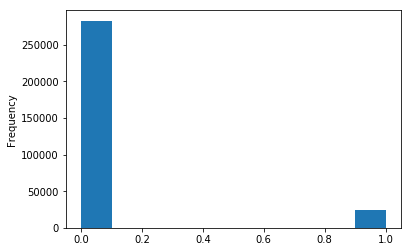

In [13]:
app_train['TARGET'].astype(int).plot.hist();

From this information, we see this is an imbalanced class problem. 

There are far more loans that were repaid on time than loans that were not repaid. 

Once we get into more sophisticated machine learning models, 
we can weight the classes by their representation in the data to reflect this imbalance.

## Examine Missing Values¶
Next we can look at the number and percentage of missing values in each column.

In [14]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Dummy Variables ---see +VIDS

## Understanding Metrics - https://www.youtube.com/watch?v=iKLvTiikQao

When it comes time to build our machine learning models, 

we will have to fill in these missing values (known as imputation). 

In later work, we will use models such as XGBoost that can handle missing values 
with no need for imputation. 

Another option would be to drop columns with a high percentage of missing values, 

although it is impossible to know ahead of time if these columns will be helpful to our model. 

Therefore, we will keep all of the columns for now.

### Column Types
Let's look at the number of columns of each data type. 

int64 and float64 are numeric variables (which can be either discrete or continuous). ==> use this in TABLEAU

object columns contain strings and are categorical features. .

In [21]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Let's now look at the number of unique entries in each of the object (categorical) columns.

In [22]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. 

We will need to find a way to deal with these categorical variables!

## Encoding Categorical Variables
Before we go any further, we need to deal with "buggy/problemstic" categorical variables. 

A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). 

Therefore, we have to find a way to encode (Represent) these variables as numbers before handing 
them off to the model. 

#### There are two main ways to carry out this process:

### Label encoding: 
    assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below

### One-hot encoding: 
    create a new column for each unique category in a categorical variable. 
    
    Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.
    
#### TensorFlow + One-hot encoding ==> https://www.youtube.com/watch?v=Gql-LxoGvXA

#### Dummy Variables  + One-hot encoding ==> https://www.youtube.com/watch?v=9yl6-HEY7_s
    

### ????
No more search, here https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

Recheck if these are the best links
    https://www.youtube.com/watch?v=9yl6-HEY7_s

## Dimensionality_reduction - https://en.wikipedia.org/wiki/Dimensionality_reduction

After we decide on the ENCODING.... 

"Label Encoding VS One-hot encoding"


the data will be much better suited for MACHINE LEARNING...???Research more??

but, altough it seems "better" it may also nees a Dimensionality_reduction

https://en.wikipedia.org/wiki/Dimensionality_reduction

### Aligning Training and Testing Data
There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

## Imputation
what exactly is "Imputation"

### ???
why allign: Training data + TEsting Data

In [ ]:
????

The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we probably will want to try dimensionality reduction (removing features that are not relevant) to reduce the size of the datasets.

In [ ]:
?????

### Back to Exploratory Data Analysis
#### Anomalies
One problem we always want to be on the lookout for when doing EDA is anomalies within the data. 


These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. 


One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method. 

The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. 

To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [16]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

##### OBS: 
    Those ages look reasonable. 
    There are no outliers for the age on either the high or low end. 
    How about the days of employment?

In [18]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

##### OBS: 
    That doesn't look right! The maximum value (besides being positive) is about 1000 years!
    ??? Let's set-uo a WORKFLOW for more...???

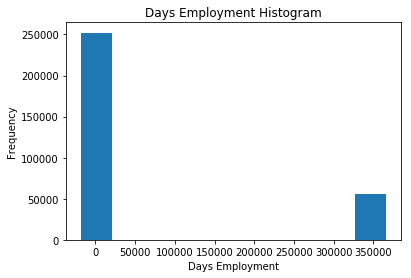

In [20]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [21]:
## Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [22]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Well that is extremely interesting! It turns out that the anomalies have a lower rate of default.

Handling the anomalies depends on the exact situation, with no set rules. 

One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. 

In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. 

The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. 

As a solution, we will fill in the anomalous values with not a number (np.nan) 
and then create a new boolean column indicating whether or not the value was anomalous.

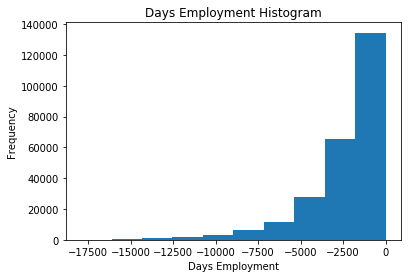

In [23]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

The distribution looks to be much more in line with what we would expect, 

and we also have created a new column to tell the model that these values were originally anomalous 

(becuase we will have to fill in the nans with some value, probably the median of the column). 

The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

As an extremely important note, anything we do to the training data we also have to do to the testing data. 

Let's make sure to create the new column and fill in the existing column with np.nan in the testing data.

In [25]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Correlations
Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. 

One way to try and understand the data is by looking for correlations between the features and the target. 

We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.
==>

The correlation coefficient is not the greatest method to represent "relevance" of a feature, 

but it does give us an idea of possible relationships within the data. 

Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong”

## Correlation and P value
What they are: https://dataschool.com/fundamentals-of-analysis/correlation-and-p-value/

Alphas, P-Values, and Confidence Intervals, Oh My! https://blog.minitab.com/blog/alphas-p-values-confidence-intervals-oh-my



### Correlation & Regression
https://www.youtube.com/watch?v=xTpHD5WLuoA&t=6s

https://www.datasciencecentral.com/profiles/blogs/difference-between-correlation-and-regression-in-statistics


In [27]:
 # Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()


# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


## VERY IMPORTANT iNSiGHTs AboVe :-) StarTiNG PoiNTs
### Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()
### .sort_values()
we sorted thru Multipls Varaibles at once...

Let's take a look at some of more significant correlations: 

the DAYS_BIRTH is the most positive correlation. 

(except for TARGET because the correlation of a variable with itself is always 1!) 

Looking at the documentation, 

DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). 

The correlation is positive, but the value of this feature is actually negative, 

meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). 

That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

## ???

### Effect of Age on Repayment

In [29]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

As the client gets older, 
there is a negative linear relationship with the target 
meaning that as clients get older, 
they tend to repay their loans on time more often.

Let's start looking at this variable. 

First, we can make a histogram of the age. 

We will put the x axis in years to make the plot a little more understandable.

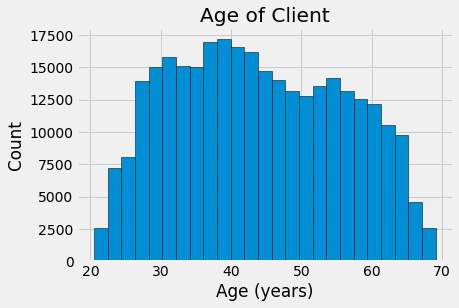

In [31]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. 

To visualize the effect of the age on the target, 

we will next make a kernel density estimation plot (KDE) 
colored by the value of the target. 

A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram

(it is created by computing a kernel, usually a Gaussian, at each data point and 

then averaging all the individual kernels to develop a single smooth curve). 

We will use the seaborn kdeplot for this graph.

## ??? change the SEABORN Graph... and google for: "KDE vs " &/or "kernel density estimate plot vs/&/oR" 
    

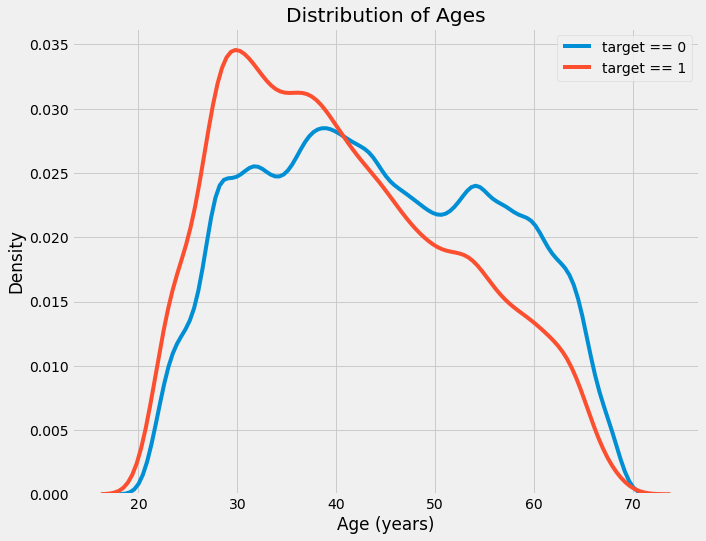

In [32]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. 

Although this is not a significant correlation (-0.07 correlation coefficient), 

this variable is likely going to be useful in a machine learning model 

because it does affect the target. 

## ==>
Let's look at this relationship in another way: 

average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. 

Then, for each bin, we calculate the average value of the target, 

which tells us the ratio of loans that were not repaid in each age category.

In [33]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/Users/mauroaz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mauroaz/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


## Avoid the "PINK Warnings"
Probably could avoid the "PINK Warnings"
if I IMPORTED this PACKAGE with this code:
#### =============================================
    # Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
#### =============================================
But, NOW i want to SEE the WARNING to LEARN...

In [34]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


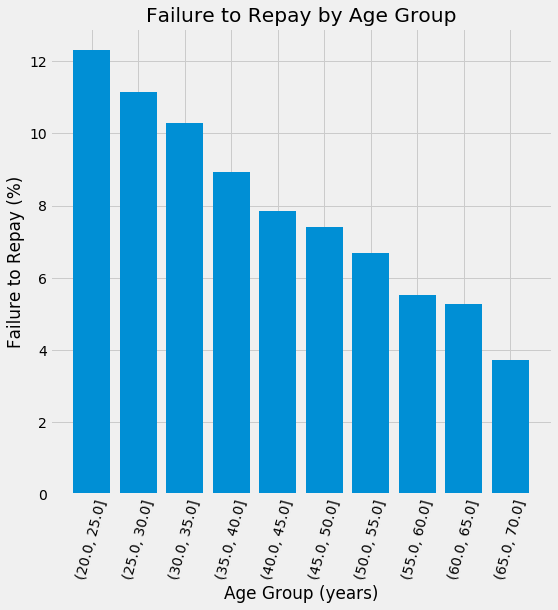

In [35]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

### iNSights
There is a clear trend: 
younger applicants are more likely to not repay the loan! 

The rate of failure to repay is above 10% for the youngest three age groups 

and below 5% for the oldest age group.

##### ====>
This is information that could be directly used by the bank: 

because younger clients are less likely to repay the loan, 

maybe they should be provided with more guidance or financial planning tips. 

This does not mean the bank should discriminate against younger clients, 

but it would be smart to take precautionary measures to help younger clients pay on time.


#### ????

## CUT oTHER BOOK

### NOTES: #aggregate
   Python | Pandas dataframe.aggregate()
Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages. Pandas is one of those packages and makes importing and analyzing data much easier.

Dataframe.aggregate() function is used to apply some aggregation across one or more column. Aggregate using callable, string, dict, or list of string/callables. Most frequently used aggregations are:

sum: Return the sum of the values for the requested axis
min: Return the minimum of the values for the requested axis
max: Return the maximum of the values for the requested axis
    SOURCE+Info: https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/

##### groupby: 
group a dataframe by a column. In this case we will group by the unique client, the SK_ID_CURR column

##### agg:    (aggregate)
perform a calculation on the grouped data such as taking the mean of columns. We can either call the function directly (grouped_df.mean()) or use the agg function together with a list of transforms (grouped_df.agg([mean, max, min, sum]))

##### merge: 
match the aggregated statistics to the appropriate client. We need to merge the original training data with the calculated stats on the SK_ID_CURR column which will insert NaN in any cell for which the client does not have the corresponding statistic

##### rename
We also use the (rename) function quite a bit specifying the columns to be renamed as a dictionary. This is useful in order to keep track of the new variables we create.

####### NOW 
Write a function to automize this process and "do it for us" 
But, let's begin by implementing this by hand first...

##### Next Steps
Automize it...

In [ ]:
### 001 -
Let's begin by choosing variables & creating our own "NEW VARIABLES" via aggregate functions...

Each of these VARIABLES will then be TESTED out in our: "Mutiple Regression Model"...

## Read in Data 

### There are a total of 10 files: 

1 main file for training (with target) ==> (application_train.csv)

1 main file for testing (without the target), ==> (application_test.csv)

1 example submission file ==> (sample_submission.csv)


### 6 other files containing additional information about each loan:

bureau_balance.csv

bureau.csv

credit_card_balance.csv

installments_payments.csv

POS_CASH_balance.csv

previous_application.csv


## PLUS + 
##### important:
(HomeCredit_columns_description.csv)

It contains the description of all the columns with extra info:

A ==> id

B ==> Table ==>(refers to each of the above 9 Data-Sets (csv files)

C ==> Row

D ==> Description

E ==> Specal ==> (for example if:

'normalized', 

"time only relative to the application", 

"rounded"

"hashed"

"recoded"

????? ===========> What does these ALL signify???


    
    

# List files available
###print(os.listdir("../input/"))

In [ ]:
Document eery pertinent thing
what are the VALUES int heoword sof the offficilaa nakler



### DEFINITIONS: 


	1.	AMTINCOMETOTAL is a monthly amount
	2.	AMT_ANNUITY is a monthly amount as mentioned in the other thread. Note that the income is self-proclaimed and there may be errors in the amount, therefore the payment-to-income ratio (annuity over income) may be incorrect in some cases
	3.	Term of the loan is not provided in the sample. However, you can approximate it
	4.	All loans are fixed rate. The annuity stays the same, however it may change in some special cases, like early repayment or installment schedule change

##### MONTHSBALANCE 
is relative to the application date of the current application (SKID_CURR)

##### SKIDCURR 
is ID of the current loan and 

##### SKIDPREV 
is ID of the previous loans and no current loan can be in the previous loans. 

##### AMTRECIVABLE - 
Amount receivable on the previous credit - i.e. total amount receivable 

##### AMTRECEIVABLE_PRINCIPAL - 
Amount receivable for principal on the previous credit, i,e. a part of receivable that is attributable to principal

##### bureaubalance.csv - MONTHSBALANCE - 
Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly)

##### POSCASHbalance.csv - MONTHS_BALANCE - 
(I renamed these...??? gotta check in the ("HomeCredit_columns_description.csv")
Month of balance relative to application date (-1 means the freshest balance date)




Dataset 
##### POSCASHBAL 
contains monthly snapshots of previous loans
	•	MONTHSBALANCE - denotes the number of months relative to the current application (i.e. the loan is being repaid with increasing MONTHSBALANCE, in other words MONTH_BALANCE is becoming less negative)
	•	CNT_INSTALMENT - denotes the total number of installments (term of the loan). This number may decrease if the client early repays the loan or increase in case of payment difficulties and change of the installment schedule
	•	CNTINSTALMENTFUTURE - denotes the number of installments to be paid
	•	NAMECONTRACTSTATUS - changes when the contract moves to another status (e.g. typically from active to completed when the loan is repaid)


 ##### EMP 
 stands for employer, therefore:
	•	FLAGEMPPHONE - employer phone
	•	FLAGWORKPHONE - work phone
	•	FLAG_PHONE - home phone

#####  'XAP' and 'XNA'  and “HC” are nan values. 
(https://www.kaggle.com/c/home-credit-default-risk/discussion/58209)

#####  'XAP' and 'XNA' 
==> (https://www.kaggle.com/c/home-credit-default-risk/discussion/57248)
or (https://www.kaggle.com/c/home-credit-default-risk/discussion/59274)




My 2 cents: I'll read it as:
#####  XNA = not available

##### XAP = not applicable (X as a logical not !?) i.e. a consumer loan has no cashloanpurpose.

Backing it with data from browsing the previous applications table.
NAMECONTRACTTYPE NAMECASHLOAN_PURPOSE
0 Consumer loans XAP
1 Cash loans XNA


 Value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values. Also XNA/XAP denote NA values. (https://www.kaggle.com/c/home-credit-default-risk/discussion/57247)

#### ALL discusions are 
HERE ==> https://www.kaggle.com/c/home-credit-default-risk/discussion

its important to look at this make a GRAPH?? 
HomeCredit_columns_description

PATH:
    /Users/mauroaz/Desktop/Capstone 4 - END/_Capstone_04_Loan/home-credit-default-risk/HomeCredit_columns_description.csv

## CUT oTHER BOOK

### RESEARCH:
P-Hacking  - https://www.youtube.com/watch?v=Gx0fAjNHb1M

bonferroni correction - https://www.youtube.com/watch?v=rMuNniCTsOw
    

## Very Interesting --> https://www.kaggle.com/alijs1/explaining-model-s-predictions

## BEGIN new NoteBOOk like this: https://www.kaggle.com/sz8416/eda-baseline-model-using-application

#### EDA ordered by

##### Categorical Features
    Target, Gender, Occupation, Income, House Typw, Credit Type, ....
    
    

##### Numerical Features
    Credit amount, Annuity Amount, Days Employed, 
    
    
##### Categorical Features by Labels

##### Numerical Features by Labels


### 4 A further exploration on application table
4.1 Impute missing values

### convert categorical using LabelEncoder
    input Missing Values
    
## 4.2 Create more features
??????????????/


## 4.3 Train model
?????????????/
application: 'binary' for binary classification

num_iterations: number of boosting iterations/trees, n_estimators in sklearn

learning_rate

num_leaves: number of leaves in one tree

feature_fraction: part of features used for each iteration

bagging_fraction: part of data used for each iteration

lambda_l1/lambda_l2: L1/L2 regularization

min_split_gain: the minimun gain to perform a split

early_stopping_round: if the validation metric can't improve for n rounds, stop iteration

categorical_feature: LightGBM API can deal with categorical feature automatically, but we need transform string into integer



## STATS - ?? INTERESTING https://www.kaggle.com/janiobachmann/loan-classification-detecting-credit-defaults